In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Na          11      22.99    0.0000  A   2.43928e-01  3.65846e-01  ; Joung2008 parameters for TIP3P
sigma = 0.303796 # Amber
sig_chg = { 0:np.array([1.0]),
            5:np.linspace(1          , 1- 5*0.003, 2),
           10:np.linspace(1          , 1-10*0.003, 3),
           15:np.linspace(1-15*0.001 , 1-15*0.003, 3),
           20:np.linspace(1-20*0.0015, 1-20*0.003, 4),
           25:np.linspace(1-25*0.0015, 1-25*0.003, 4),
           30:np.linspace(1-30*0.0015, 1-30*0.003, 5),
           35:np.linspace(1-35*0.0015, 1-35*0.003, 5),
           40:np.linspace(1-40*0.0015, 1-40*0.003, 5)}

(1.05, 0.55)

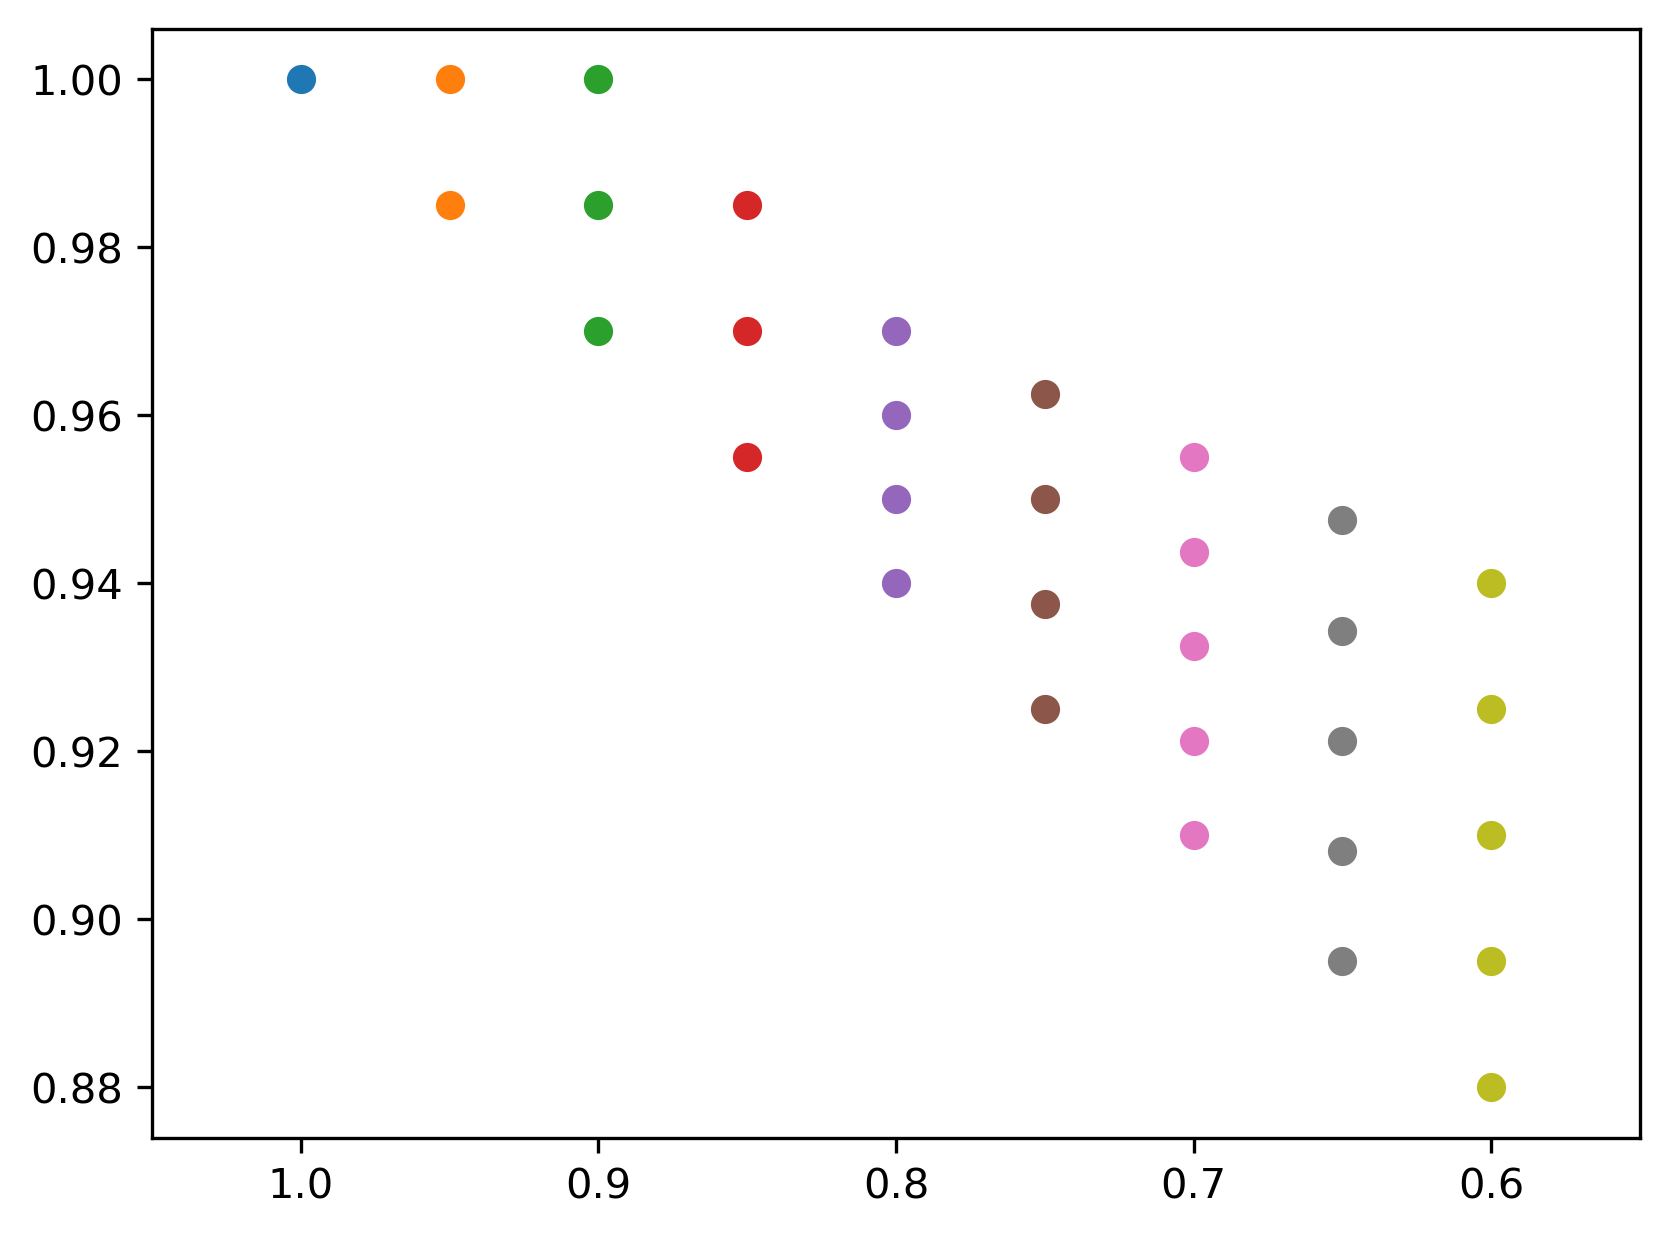

In [3]:
plt.figure(0, dpi=300)
win_count = 0
for chg, sig_array in sig_chg.items():
    plt.scatter(np.ones(sig_array.shape)* (1-0.01 * chg), sig_array)
    win_count += len(sig_array)
plt.xlim(1.05, 0.55)

In [7]:
sigma = 2.43928e-01
print("base=$PWD")
for ind, (chg, sig_array) in enumerate(sig_chg.items()):
    base_dir = Path(f"{ind}-{1-chg/100:.2f}")
    for i, sig in enumerate(sig_array):
        print(f"mkdir -p $base/{base_dir}/01-rad-scan/win_{i}")
        print(f"cd       $base/{base_dir}/01-rad-scan/win_{i}")
        print("cp ../../../tmp/01-rad-scan/tmp/* ./")
        print(f"echo \"Na_new          11      22.99    0.0000  A {sig*sigma:.9f}   3.65846e-01  ; Joung2008 TIP3P 2.43928e-01  3.65846e-01 \" ", end="")
        print(f">> K_ffnonbonded.itp ")
        print(f"sed -i \"s/K_CHARGE/{1-chg/100:.2f}/g\" ions.itp")
print()

base=$PWD
mkdir -p $base/0-1.00/01-rad-scan/win_0
cd       $base/0-1.00/01-rad-scan/win_0
cp ../../../tmp/01-rad-scan/tmp/* ./
echo "Na_new          11      22.99    0.0000  A 0.243928000   3.65846e-01  ; Joung2008 TIP3P 2.43928e-01  3.65846e-01 " >> K_ffnonbonded.itp 
sed -i "s/K_CHARGE/1.00/g" ions.itp
mkdir -p $base/1-0.95/01-rad-scan/win_0
cd       $base/1-0.95/01-rad-scan/win_0
cp ../../../tmp/01-rad-scan/tmp/* ./
echo "Na_new          11      22.99    0.0000  A 0.243928000   3.65846e-01  ; Joung2008 TIP3P 2.43928e-01  3.65846e-01 " >> K_ffnonbonded.itp 
sed -i "s/K_CHARGE/0.95/g" ions.itp
mkdir -p $base/1-0.95/01-rad-scan/win_1
cd       $base/1-0.95/01-rad-scan/win_1
cp ../../../tmp/01-rad-scan/tmp/* ./
echo "Na_new          11      22.99    0.0000  A 0.240269080   3.65846e-01  ; Joung2008 TIP3P 2.43928e-01  3.65846e-01 " >> K_ffnonbonded.itp 
sed -i "s/K_CHARGE/0.95/g" ions.itp
mkdir -p $base/2-0.90/01-rad-scan/win_0
cd       $base/2-0.90/01-rad-scan/win_0
cp ../../../tmp/01-rad

In [6]:
print(f"# sigma = {sigma}")
print("base=$PWD")
for ind, (chg, sig_array) in enumerate(sig_chg.items()):
    base_dir = Path(f"{ind}-{1-chg/100:.2f}")
    if ind % 2 == 1:
        for i in range(len(sig_array)):
            # print(i, end=" ")
            print(f"{base_dir}/01-rad-scan/win_{i} ", end="")
        print("\\")
    else:
        for i in list(range(len(sig_array)))[::-1]:
            # print(i, end=" ")
            print(f"{base_dir}/01-rad-scan/win_{i} ", end="")
        print("\\")
            



# sigma = 0.243928
base=$PWD
0-1.00/01-rad-scan/win_0 \
1-0.95/01-rad-scan/win_0 1-0.95/01-rad-scan/win_1 \
2-0.90/01-rad-scan/win_2 2-0.90/01-rad-scan/win_1 2-0.90/01-rad-scan/win_0 \
3-0.85/01-rad-scan/win_0 3-0.85/01-rad-scan/win_1 3-0.85/01-rad-scan/win_2 \
4-0.80/01-rad-scan/win_3 4-0.80/01-rad-scan/win_2 4-0.80/01-rad-scan/win_1 4-0.80/01-rad-scan/win_0 \
5-0.75/01-rad-scan/win_0 5-0.75/01-rad-scan/win_1 5-0.75/01-rad-scan/win_2 5-0.75/01-rad-scan/win_3 \
6-0.70/01-rad-scan/win_4 6-0.70/01-rad-scan/win_3 6-0.70/01-rad-scan/win_2 6-0.70/01-rad-scan/win_1 6-0.70/01-rad-scan/win_0 \
7-0.65/01-rad-scan/win_0 7-0.65/01-rad-scan/win_1 7-0.65/01-rad-scan/win_2 7-0.65/01-rad-scan/win_3 7-0.65/01-rad-scan/win_4 \
8-0.60/01-rad-scan/win_4 8-0.60/01-rad-scan/win_3 8-0.60/01-rad-scan/win_2 8-0.60/01-rad-scan/win_1 8-0.60/01-rad-scan/win_0 \
